# Neural net example

In this notebook we train a simple Neural Net to predict the price-category of a new mobile phone. We use the [`mobile price classification` dataset](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification) for this example. You can download this on kaggle or find it at assembl

import numpy as np
import pandas as pd

dataset = pd.read_csv('mobile-pricing/train.csv') 
dataset.head() 

In [2]:
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

In [3]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [4]:
from sklearn.preprocessing import OneHotEncoder
y = OneHotEncoder().fit_transform(y).toarray()

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100


2023-06-08 11:51:48.892674: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


29/29 [==============================] - 0s 501us/step - loss: 1.5148 - accuracy: 0.2750
Epoch 2/100
29/29 [==============================] - 0s 468us/step - loss: 1.4023 - accuracy: 0.2989
Epoch 3/100
29/29 [==============================] - 0s 390us/step - loss: 1.3458 - accuracy: 0.3456
Epoch 4/100
29/29 [==============================] - 0s 433us/step - loss: 1.2981 - accuracy: 0.3767
Epoch 5/100
29/29 [==============================] - 0s 427us/step - loss: 1.2498 - accuracy: 0.4222
Epoch 6/100
29/29 [==============================] - 0s 403us/step - loss: 1.1944 - accuracy: 0.4633
Epoch 7/100
29/29 [==============================] - 0s 402us/step - loss: 1.1310 - accuracy: 0.4983
Epoch 8/100
29/29 [==============================] - 0s 403us/step - loss: 1.0568 - accuracy: 0.5450
Epoch 9/100
29/29 [==============================] - 0s 401us/step - loss: 0.9782 - accuracy: 0.5872
Epoch 10/100
29/29 [==============================] - 0s 406us/step - loss: 0.8982 - accuracy: 0.6411
E

29/29 [==============================] - 0s 396us/step - loss: 0.0599 - accuracy: 0.9867
Epoch 82/100
29/29 [==============================] - 0s 410us/step - loss: 0.0585 - accuracy: 0.9867
Epoch 83/100
29/29 [==============================] - 0s 418us/step - loss: 0.0577 - accuracy: 0.9878
Epoch 84/100
29/29 [==============================] - 0s 433us/step - loss: 0.0583 - accuracy: 0.9867
Epoch 85/100
29/29 [==============================] - 0s 393us/step - loss: 0.0569 - accuracy: 0.9878
Epoch 86/100
29/29 [==============================] - 0s 383us/step - loss: 0.0545 - accuracy: 0.9883
Epoch 87/100
29/29 [==============================] - 0s 385us/step - loss: 0.0547 - accuracy: 0.9878
Epoch 88/100
29/29 [==============================] - 0s 403us/step - loss: 0.0531 - accuracy: 0.9889
Epoch 89/100
29/29 [==============================] - 0s 378us/step - loss: 0.0517 - accuracy: 0.9878
Epoch 90/100
29/29 [==============================] - 0s 391us/step - loss: 0.0509 - accuracy: 

In [9]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = np.argmax(y_pred, axis=1)
test = np.argmax(y_test, axis=1)

7/7 [==============================] - 0s 456us/step


In [10]:
from sklearn.metrics import accuracy_score

a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 91.5


In [11]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0423 - accuracy: 0.9917 - val_loss: 0.2226 - val_accuracy: 0.9150
Epoch 2/100
29/29 [==============================] - 0s 775us/step - loss: 0.0413 - accuracy: 0.9922 - val_loss: 0.2246 - val_accuracy: 0.9100
Epoch 3/100
29/29 [==============================] - 0s 762us/step - loss: 0.0403 - accuracy: 0.9922 - val_loss: 0.2246 - val_accuracy: 0.9100
Epoch 4/100
29/29 [==============================] - 0s 771us/step - loss: 0.0395 - accuracy: 0.9933 - val_loss: 0.2231 - val_accuracy: 0.9100
Epoch 5/100
29/29 [==============================] - 0s 774us/step - loss: 0.0383 - accuracy: 0.9950 - val_loss: 0.2284 - val_accuracy: 0.9000
Epoch 6/100
29/29 [==============================] - 0s 755us/step - loss: 0.0383 - accuracy: 0.9939 - val_loss: 0.2250 - val_accuracy: 0.9150
Epoch 7/100
29/29 [==============================] - 0s 790us/step - loss: 0.0373 - accuracy: 0.9944 - val_loss: 0.2259 - val_accuracy: 0.9150
E

Epoch 58/100
29/29 [==============================] - 0s 759us/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.2682 - val_accuracy: 0.9150
Epoch 59/100
29/29 [==============================] - 0s 761us/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.2686 - val_accuracy: 0.9100
Epoch 60/100
29/29 [==============================] - 0s 735us/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.2677 - val_accuracy: 0.9100
Epoch 61/100
29/29 [==============================] - 0s 714us/step - loss: 0.0163 - accuracy: 0.9994 - val_loss: 0.2650 - val_accuracy: 0.9150
Epoch 62/100
29/29 [==============================] - 0s 736us/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.2664 - val_accuracy: 0.9100
Epoch 63/100
29/29 [==============================] - 0s 725us/step - loss: 0.0155 - accuracy: 0.9994 - val_loss: 0.2685 - val_accuracy: 0.9100
Epoch 64/100
29/29 [==============================] - 0s 746us/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.2675 - val_accuracy:

In [ ]:
history.history.keys()

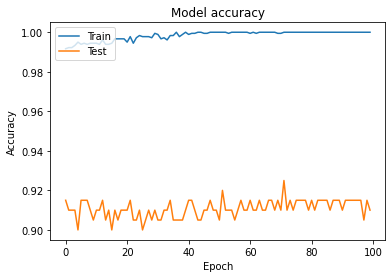

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

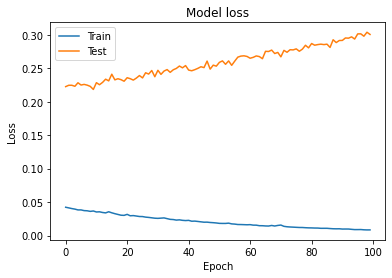

In [13]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()